# Project-   Zomato Rating Prediction

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('zomato.csv')

## Data Cleaning
**_Checking the Null values of all the Columns in the dataset_**

In [5]:
data.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


**_Dropping the unwanted column in the dataset_**

In [6]:
df = data.drop(['url','phone'],axis=1)

**_Checking the dataset whether its is having a duplicate values or not_**

In [7]:
print(df.duplicated().sum())

43


**_Dropping all the duplicate value from the dataset and checking the duplicate value after dropping it._**

In [8]:
df.drop_duplicates(inplace=True)
display(df.duplicated().sum())

0

**_Dropping all the null value from the dataset and Checking the Null values of all the Columns after dropping it._**

In [9]:
df.dropna(how='any',inplace=True)
display(df.isnull().sum())

,0
address,0
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
dish_liked,0
cuisines,0


**_Getting all the column from the dataset_**

In [10]:
display(df.columns)

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

**_Renaming the columns of the dataset for making it simple_**

In [11]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

**_Checking the column name from the dataset after renaming it_**

In [12]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

**_Getting all the unique value of the cost column from the dataset_**

In [13]:
display(df['cost'].unique())

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

**_Updating the cost column with the appropriate form of numerics_**

In [14]:
df['cost']=df['cost'].apply(lambda x:x.replace(',',''))

**_Getting all the unique value of the cost column from the dataset after changing it to numeric form_**

In [15]:
display(df['cost'].unique())

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1200', '150', '350', '250', '1500', '1300',
       '1000', '100', '900', '1100', '1600', '950', '230', '1700', '1400',
       '1350', '2200', '2000', '1800', '1900', '180', '330', '2500',
       '2100', '3000', '2800', '3400', '40', '1250', '3500', '4000',
       '2400', '1450', '3200', '6000', '1050', '4100', '2300', '120',
       '2600', '5000', '3700', '1650', '2700', '4500'], dtype=object)

**_Changing the data type of the cost column from "Object" to "Float"_**

In [16]:
df['cost']=df['cost'].astype('float')

**_Checking the value counts for cost columns from the dataset_**

In [17]:
df.cost.value_counts()

,count
cost,
400.0,2485
500.0,2323
600.0,2175
300.0,1694
800.0,1664
1000.0,1242
700.0,1207
1200.0,908
200.0,873


**_Updating the rate column without having "NEW" in it for the future processing_**

In [18]:
df = df.loc[df.rate !='NEW']

**_Getting all the unique value of the rate column from the dataset_**

In [19]:
display(df['rate'].unique())

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

**_Updating the rate column as it can be tansformed into proper form of  numerics_**

In [20]:
df['rate']=df['rate'].apply(lambda x:x.replace('/5',''))

**_Getting all the unique value of the rate column from the dataset after updating it._**

In [21]:
display(df['rate'].unique())

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

## Visualizations
**_Assigning the Top 20 restaurants to the new variable for the simple visualization_**

In [22]:
chains = df['name'].value_counts()[:20]

**_Plotting the bar graph for the most famous restaurants(Top 20 restaurants) and saving the PNG file_**

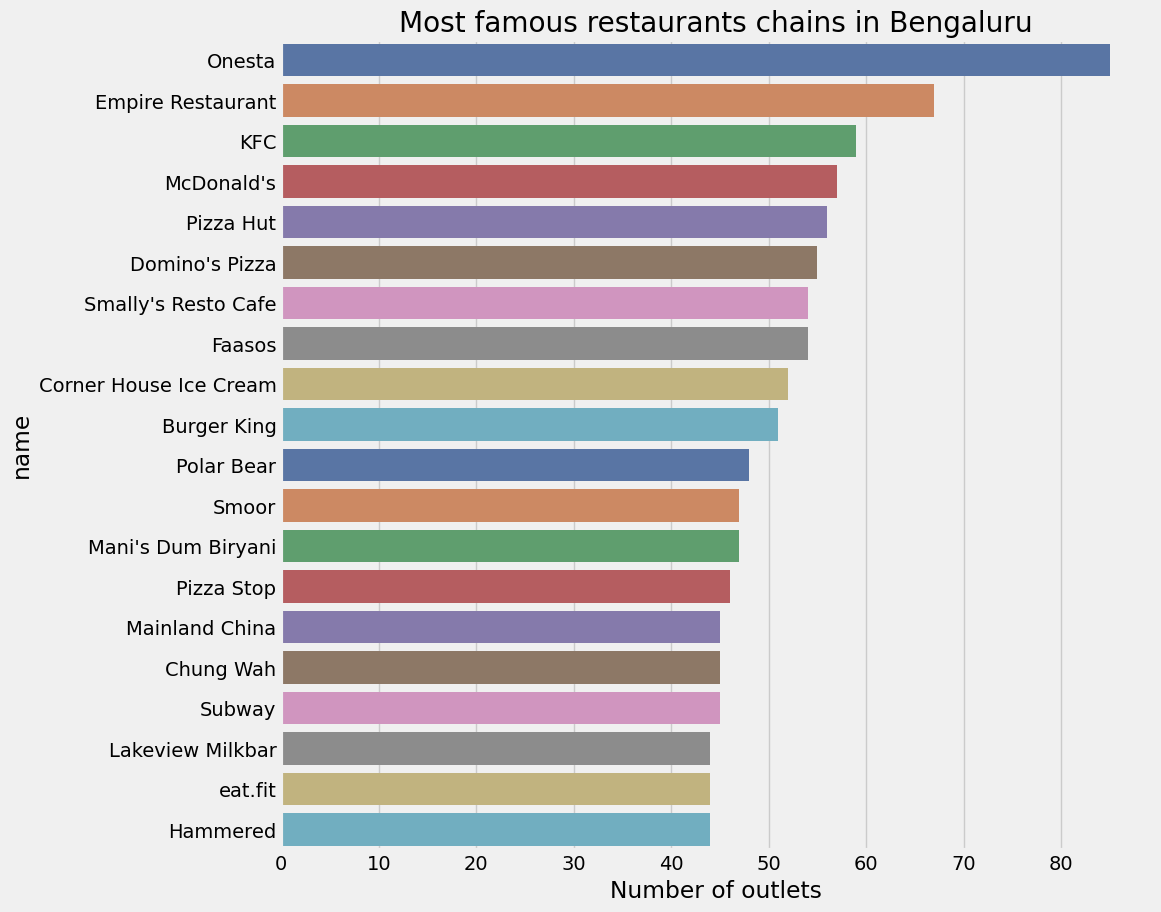

In [23]:
plt.figure(figsize=(10,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title('Most famous restaurants chains in Bengaluru')
plt.xlabel('Number of outlets')
plt.savefig('Most Famous Restaurants in Bengaluru.png')
plt.show()

**_Plotting the Pie-Chart with table booking value._**

In [24]:
x=df['book_table'].value_counts()
colors = ['#800080', '#0000A0']
trace=go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors,
                           line=dict(color='#001000', width=2)))
layout=go.Layout(title="Table booking",width=600,height=600)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')
plt.show()

**_Plotting the bar Plot with the online delivery using seaborn count plot package and saving the PNG file_**

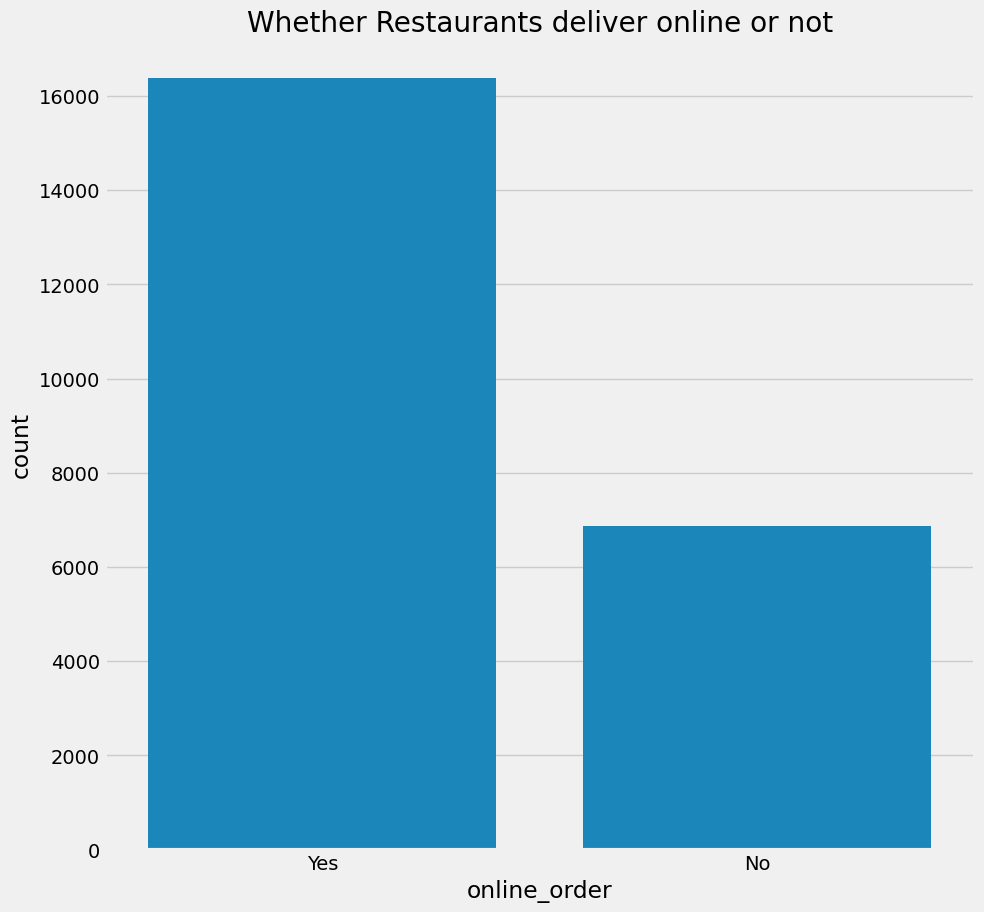

In [25]:
sns.countplot(x='online_order',data = df)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Whether Restaurants deliver online or not')
plt.savefig(' Online delivery of restaurants.png')
plt.show()

**_Visualizing the data distribution of a rate column against the density distribution using Seaborn Distplot and saving the PNG file_**

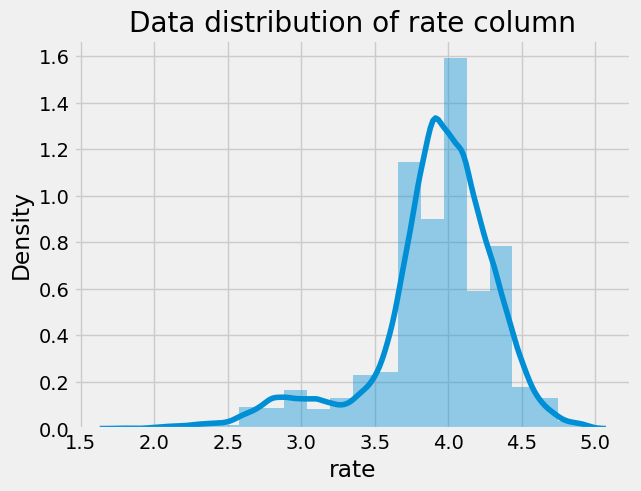

In [26]:
sns.distplot(df['rate'],bins=20)
plt.title('Data distribution of rate column')
plt.savefig('Data distribution of rate column.png')
plt.show()

**_Getting the Minumim and Maximum Rating of the Restaurants_**

In [27]:
display(df['rate'].min())
display(df['rate'].max())

'1.8'

'4.9 '

**_Getting all the unique value of the rate column from the dataset_**

In [28]:
df.rate.unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

**_Changing the data type of the cost column from "Object" to "Float"_**

In [29]:
df['rate']=df['rate'].astype('float')

**_Getting all the unique value of the rate column from the dataset after updating the data types_**

In [30]:
df.rate.unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

**_plotting the Bar Graph using matplotlib package with the rate column grouping it by the unit difference and saving the PNG file_**

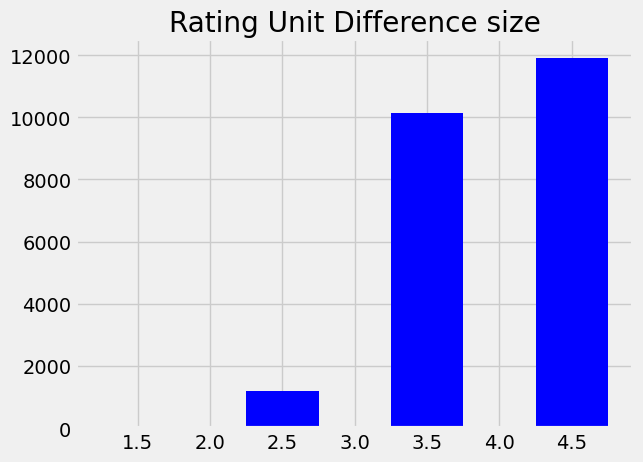

In [31]:
group = [1,2,3,4,5]
plt.hist(df['rate'],group,histtype='bar',rwidth=0.5,color='b')
plt.title('Rating Unit Difference size')
plt.savefig('Rating unit Difference Size.png')
plt.show()

**_plotting the Bar Graph using matplotlib package with the rate column grouping it by the unit difference and saving the PNG file_**

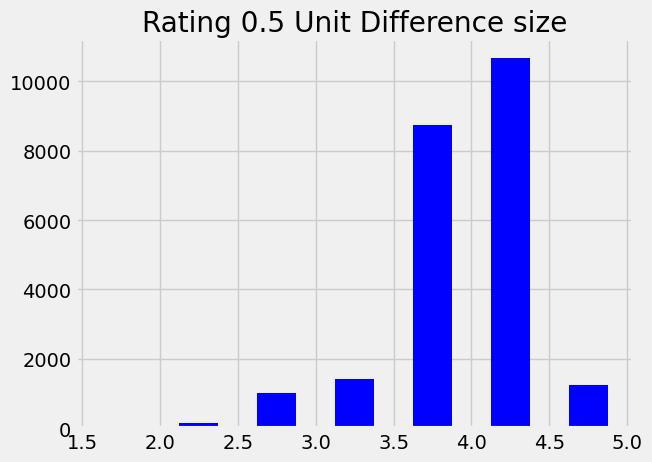

In [32]:
group = [1.5,2,2.5,3,3.5,4,4.5,5]
plt.hist(df['rate'],group,histtype='bar',rwidth=0.5,color='b')
plt.title('Rating 0.5 Unit Difference size')
plt.savefig('Rating 0.5 unit Difference Size.png')
plt.show()

**_Assigning the different variables for the rate column for using Pie Chart to visualize the percentage of restaurants according to ratings._**

In [33]:
gr_1to2=((df['rate']>=1) & (df['rate']<2)).sum()
gr_2to3=((df['rate']>=2) & (df['rate']<3)).sum()
gr_3to4=((df['rate']>=3) & (df['rate']<4)).sum()
gr_4to5=(df['rate']>=4).sum()

**_Plotting the pie chart with assigned value to visualize the percentage of restaurants according to ratings and saving the PNG file._**

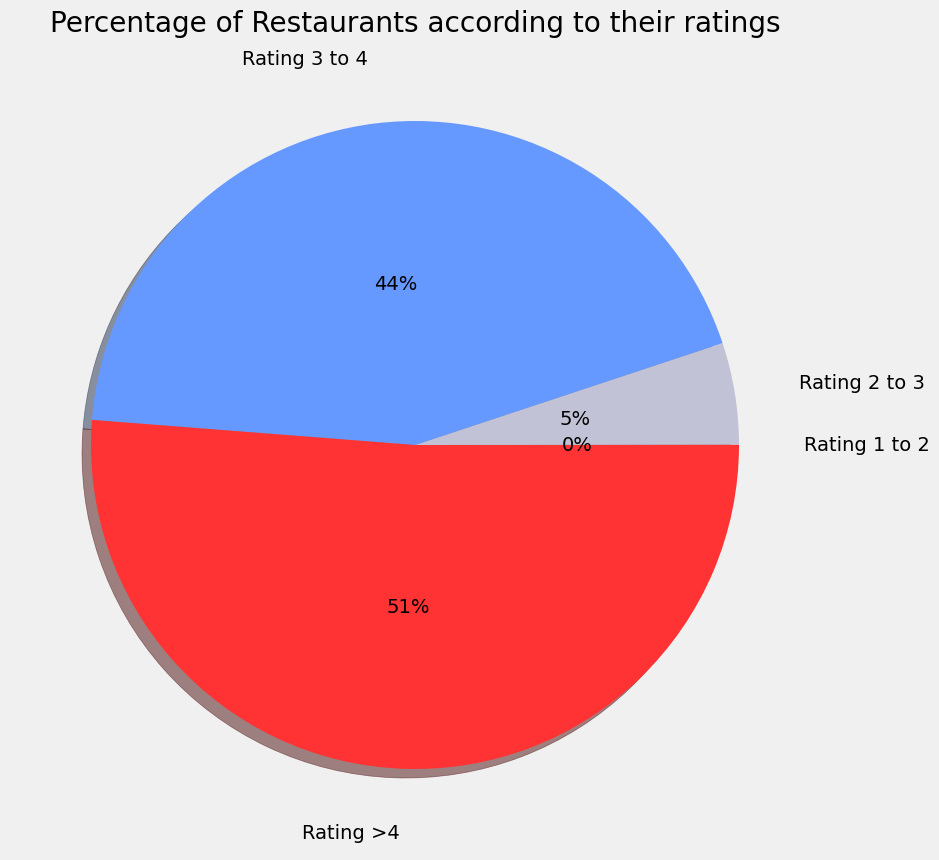

In [34]:
slices=[gr_1to2,gr_2to3,gr_3to4,gr_4to5]
labels=['Rating 1 to 2','Rating 2 to 3','Rating 3 to 4','Rating >4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")
plt.savefig('Percentage of Restaurants according to their ratings.png')
fig.set_size_inches(10,10)
plt.show()


**_Plotting the bar Plot with the service type using seaborn count plot package and saving the PNG file_**

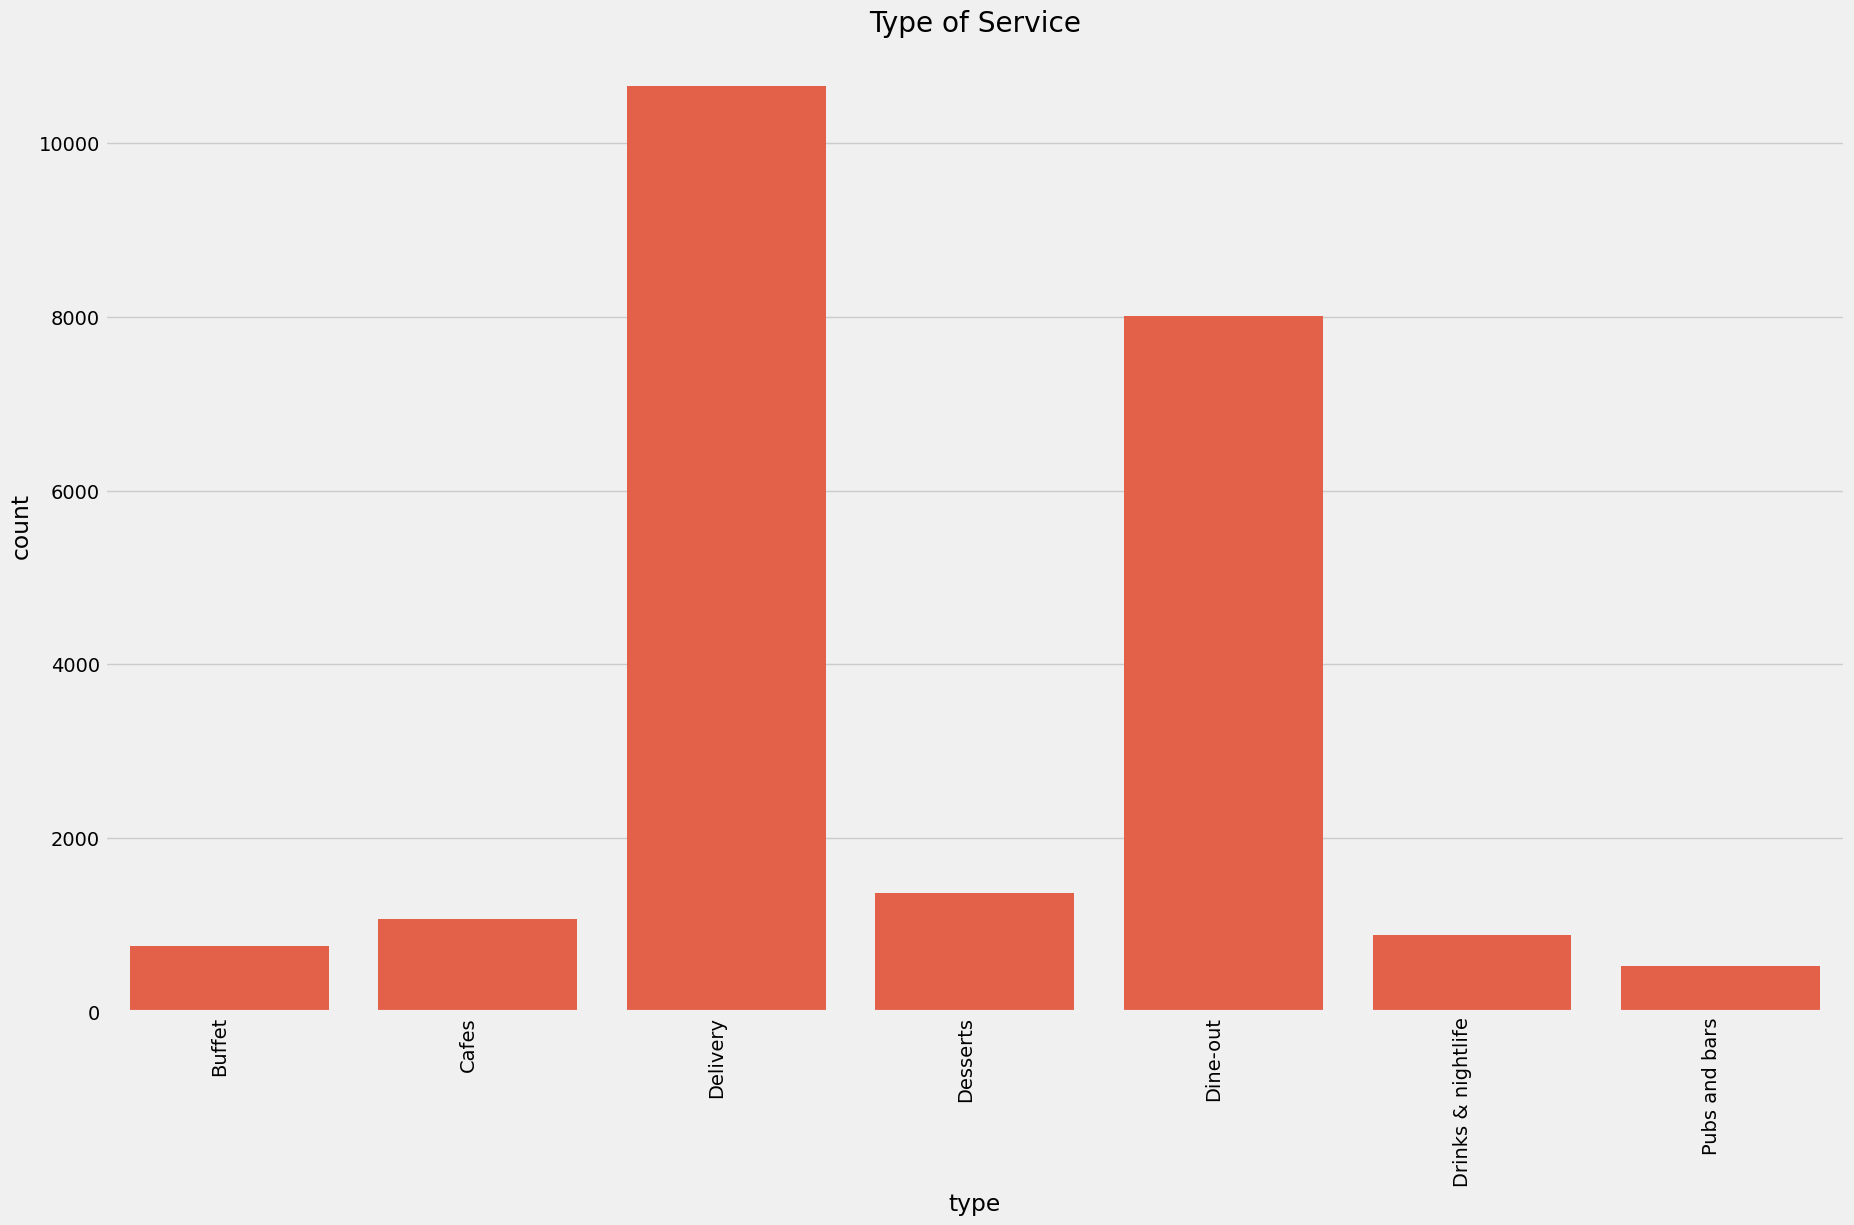

In [35]:
sns.countplot(x= 'type', data = df).set_xticklabels(sns.countplot(x= 'type' , data = df).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.title('Type of Service')
plt.savefig('type of Service.png')
plt.show()


**_Grouping by the cost column from the dataset by their sizes_**

In [36]:
print (df.groupby('cost').size())

cost
40.0         8
100.0      120
120.0        2
150.0      371
180.0       17
200.0      869
230.0       10
250.0      697
300.0     1688
330.0        4
350.0      553
400.0     2478
450.0      719
500.0     2321
550.0      440
600.0     2168
650.0      644
700.0     1202
750.0      651
800.0     1647
850.0      122
900.0      524
950.0       47
1000.0    1218
1050.0       4
1100.0     450
1200.0     903
1250.0       8
1300.0     496
1350.0      18
1400.0     447
1450.0       5
1500.0     841
1600.0     237
1650.0       6
1700.0     229
1800.0     193
1900.0      58
2000.0     298
2100.0      60
2200.0      39
2300.0       1
2400.0      22
2500.0     143
2600.0       4
2700.0       2
2800.0      31
3000.0     159
3200.0       2
3400.0      13
3500.0      25
3700.0       1
4000.0      24
4100.0       4
4500.0       2
5000.0       1
6000.0       2
dtype: int64


**_Plotting the box plot with cost value_**

In [37]:
from plotly.offline import iplot
trace0=go.Box(y=df['cost'],name="accepting online orders",
              marker = dict(
        color = 'rgb(113, 10, 100)',
    ))
data=[trace0]
layout=go.Layout(title="Box plot of approximate cost",width=800,height=800,yaxis=dict(title="Price"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

**_Visualizing the data distribution of a cost column against the density distribution using Seaborn Distplot and saving the PNG file_**

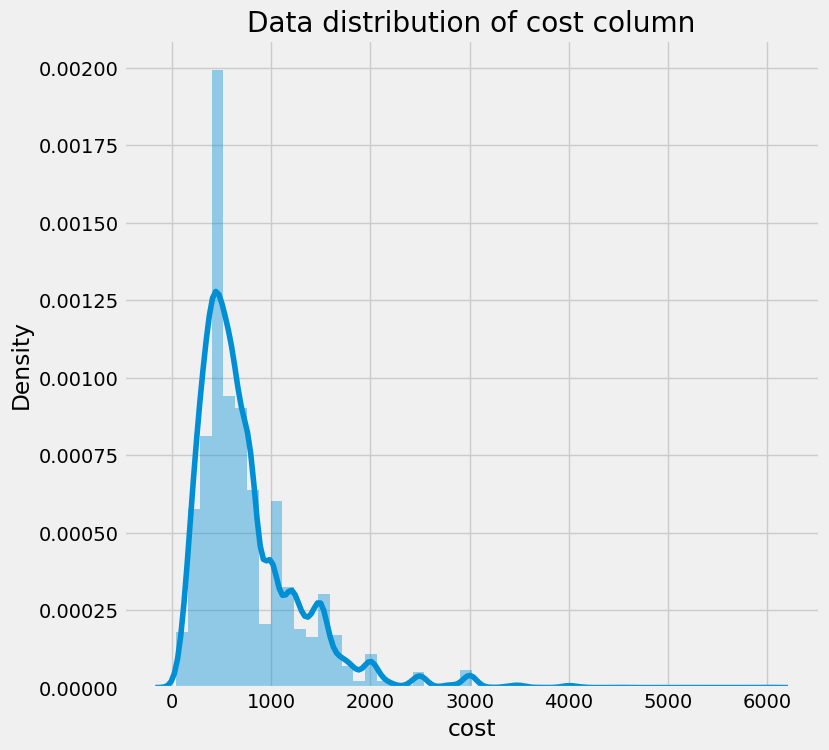

In [38]:
plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.title('Data distribution of cost column')
plt.savefig('Data distribution of cost column.png')
plt.show()

**_By using Regular Expression Package,splitting occurs in disliked columns as multiple values seperated by comma,Extract each dishes and creating a list by appending the each dishes_**

In [39]:
import re
df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)


**_Displaying the each number of dishes and its counts_**

In [40]:
display ('Number of dishes', len(likes))
display(likes)


'Number of dishes'

126848

['Pasta',
 ' Lunch Buffet',
 ' Masala Papad',
 ' Paneer Lajawab',
 ' Tomato Shorba',
 ' Dum Biryani',
 ' Sweet Corn Soup',
 'Momos',
 ' Lunch Buffet',
 ' Chocolate Nirvana',
 ' Thai Green Curry',
 ' Paneer Tikka',
 ' Dum Biryani',
 ' Chicken Biryani',
 'Churros',
 ' Cannelloni',
 ' Minestrone Soup',
 ' Hot Chocolate',
 ' Pink Sauce Pasta',
 ' Salsa',
 ' Veg Supreme Pizza',
 'Masala Dosa',
 'Panipuri',
 ' Gol Gappe',
 'Onion Rings',
 ' Pasta',
 ' Kadhai Paneer',
 ' Salads',
 ' Salad',
 ' Roti',
 ' Jeera Rice',
 'Farmhouse Pizza',
 ' Chocolate Banana',
 ' Virgin Mojito',
 ' Pasta',
 ' Paneer Tikka',
 ' Lime Soda',
 ' Prawn Pizza',
 'Pizza',
 ' Mocktails',
 ' Coffee',
 ' Nachos',
 ' Salad',
 ' Pasta',
 ' Sandwiches',
 'Waffles',
 ' Pasta',
 ' Coleslaw Sandwich',
 ' Choco Waffle',
 ' Tacos',
 ' Momos',
 ' Cheese Nachos',
 'Waffles',
 ' Pasta',
 ' Crispy Chicken',
 ' Honey Chilli Chicken',
 ' Sandwich',
 ' Coffee',
 ' Crepe',
 'Mocktails',
 ' Peri Fries',
 ' Lasagne',
 ' Pizza',
 ' Chicken 

**_Displaying the indices of dataset_**

In [41]:
df.index=range(df.shape[0])
display(df.index)

RangeIndex(start=0, stop=23248, step=1)

**_Finding out the most liked dishes and getting it value counts and displaying the top most 30 liked dishes_**

In [42]:
print("Count of Most liked dishes")
favourite_food = pd.Series(likes).value_counts()
display(favourite_food.head(30))


Count of Most liked dishes


,count
Pasta,2692
Pizza,1915
Cocktails,1880
Burgers,1736
Mocktails,1623
Biryani,1307
Sandwiches,1287
Burgers,1256
Coffee,1184
Nachos,1170


**_plotting the bar graph with the Most liked foods and number of likes it got and saving the PNG file_**

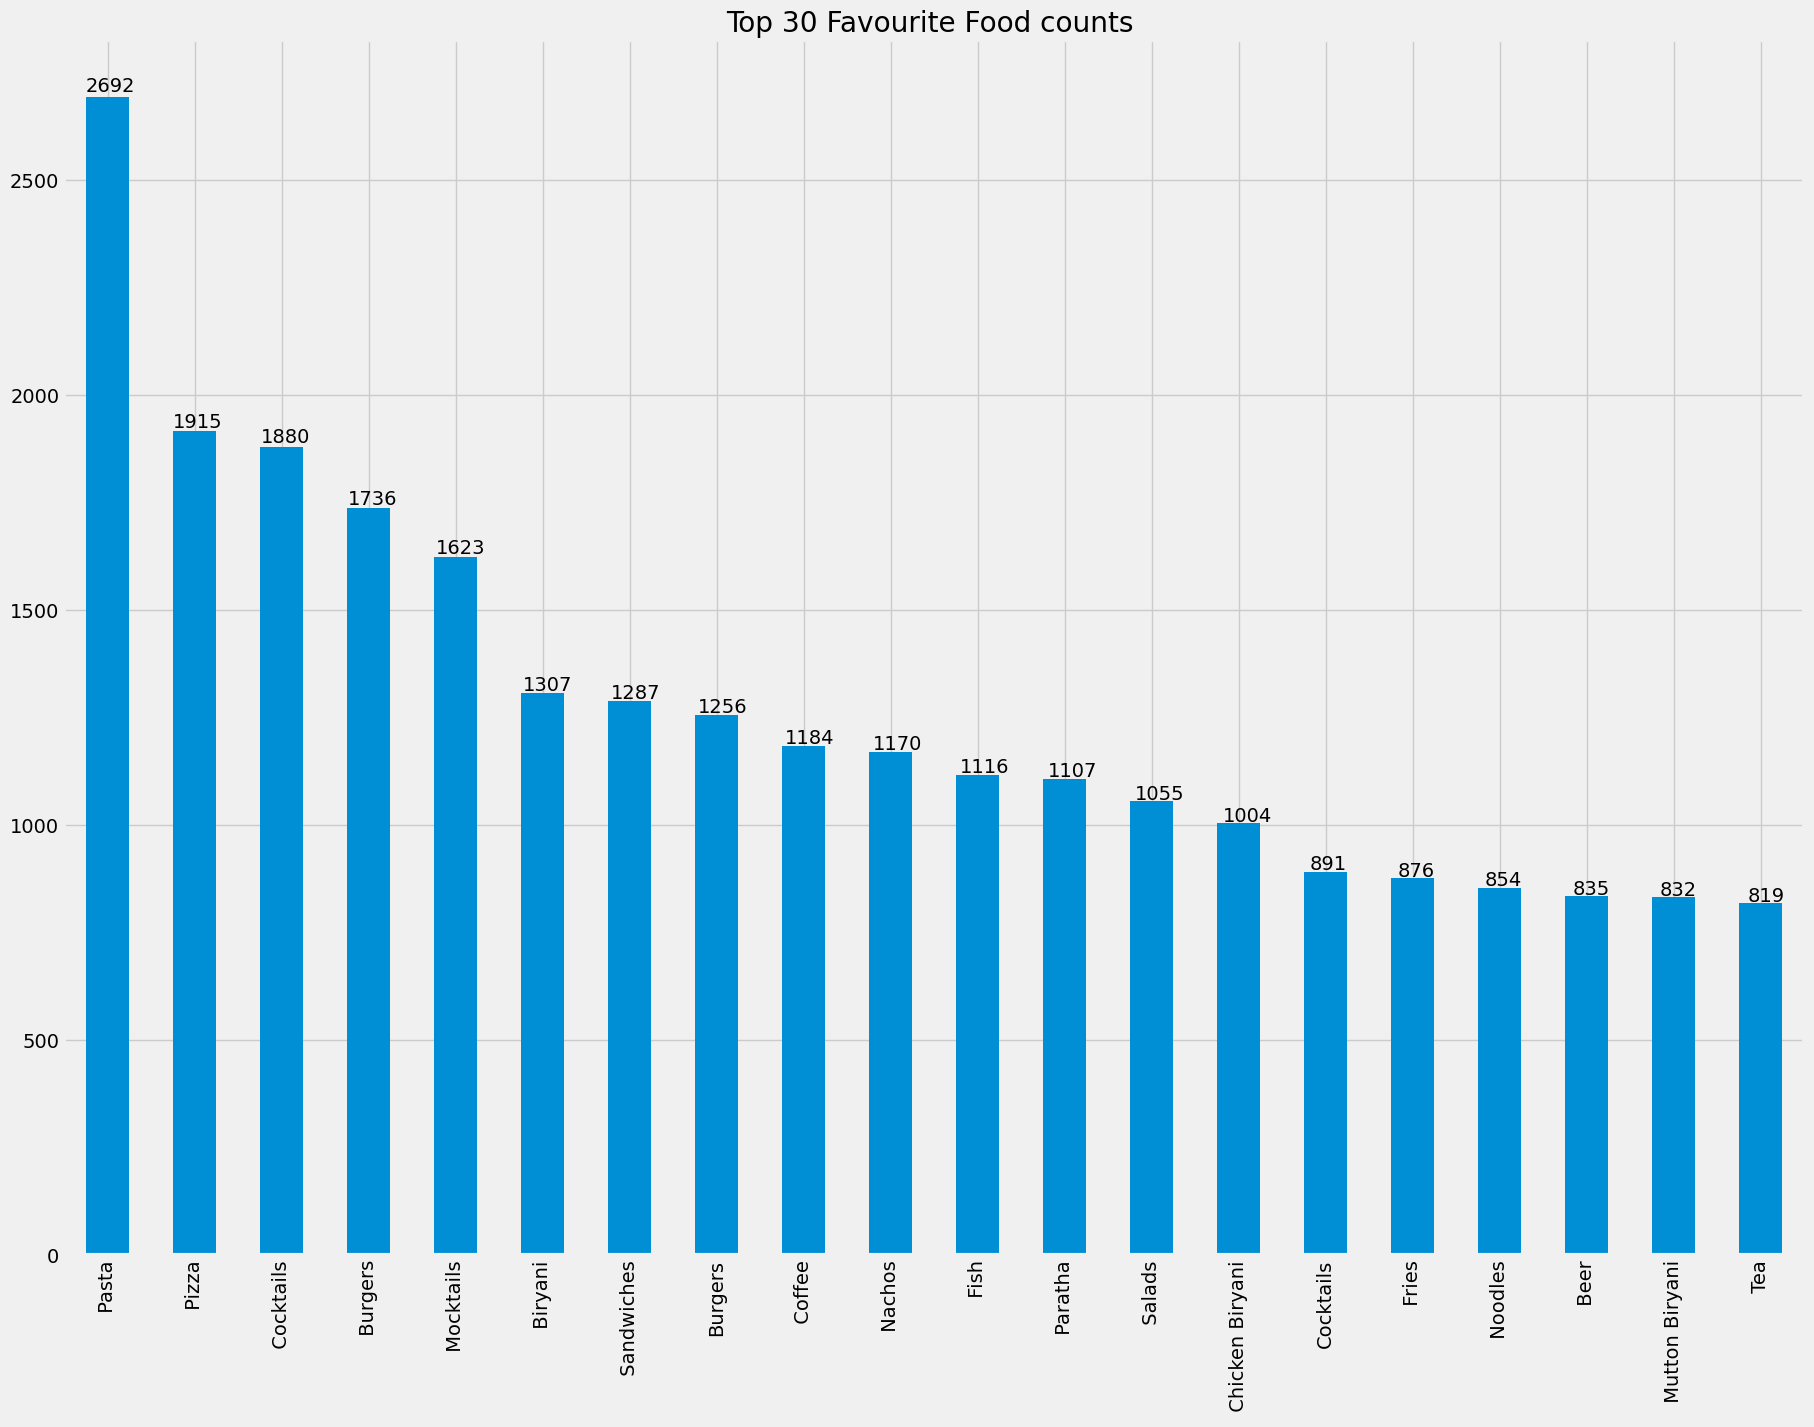

In [43]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar',figsize=(20,15),title = 'Top 30 Favourite Food counts ')
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))
plt.savefig('Top 30 Favourite Food counts.png')

**_Displaying the value counts of Restaurants type_**

In [44]:
print (df['rest_type'].value_counts().head(50))

rest_type
Casual Dining                    7326
Quick Bites                      5250
Cafe                             2375
Dessert Parlor                   1083
Casual Dining, Bar                985
Delivery                          704
Bar                               358
Takeaway, Delivery                342
Bar, Casual Dining                336
Pub                               324
Fine Dining                       311
Casual Dining, Cafe               304
Lounge                            298
Pub, Casual Dining                224
Food Court                        220
Bakery                            166
Cafe, Casual Dining               159
Dessert Parlor, Cafe              143
Beverage Shop, Quick Bites        137
Beverage Shop                     137
Cafe, Bakery                      128
Casual Dining, Pub                124
Microbrewery, Casual Dining       121
Cafe, Dessert Parlor              111
Sweet Shop                        105
Bakery, Quick Bites                96
Sw

**_Plotting the bar graph for the Restaurant Types and saving the PNG file_**

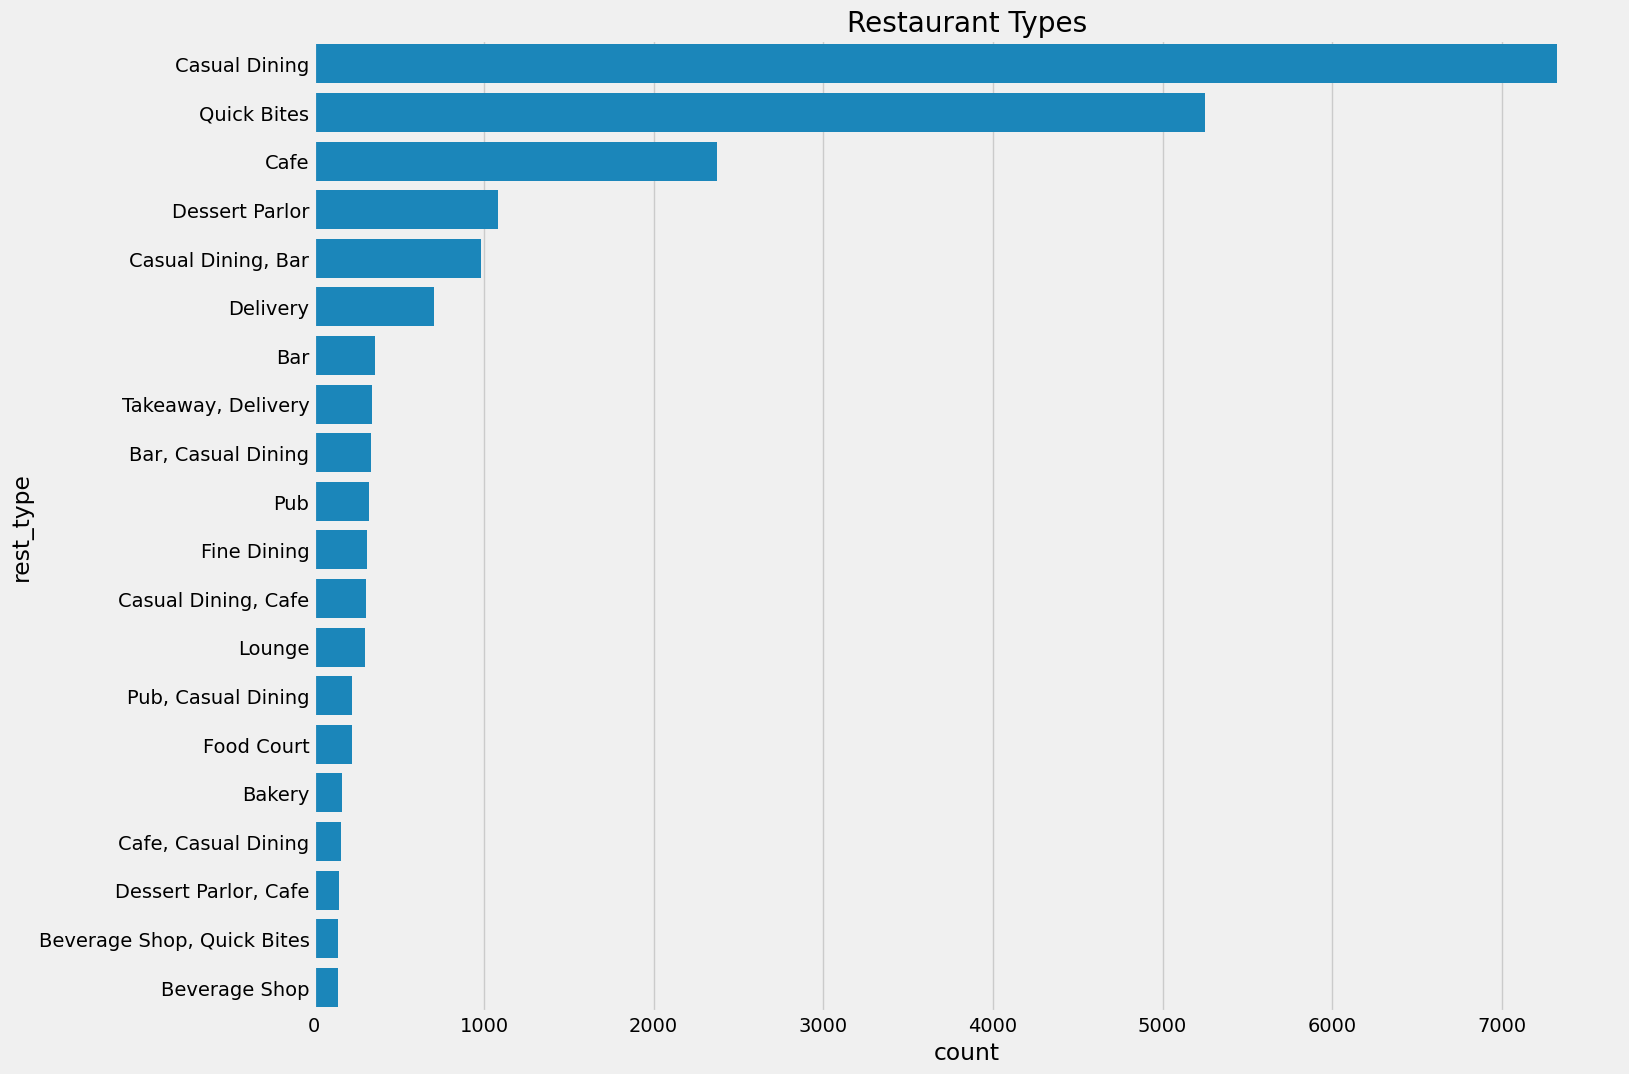

In [45]:
plt.figure(figsize=(15,12))
rest = df['rest_type'].value_counts()[:20]
sns.barplot(x=rest,y=rest.index)
plt.title('Restaurant Types')
plt.savefig('Restaurants Types.png')
plt.xlabel('count')
plt.show()

## Data Preprocessing
**_Label Encoding the online order column from the dataset for fitting the alggorithm_**

In [46]:
df['online_order']=df['online_order'].astype('category')
df['online_order']=df['online_order'].cat.codes
print(df.online_order.value_counts())

online_order
1    16378
0     6870
Name: count, dtype: int64


**_Label Encoding the Book table column from the dataset for fitting the alggorithm_**

In [47]:
df['book_table']=df['book_table'].astype('category')
df['book_table']=df['book_table'].cat.codes
df.book_table=pd.to_numeric(df.book_table)
df.book_table.value_counts()

,count
book_table,
0,17191
1,6057


**_Label Encoding all the required columns from the dataset for fitting the alggorithm_**

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.location = le.fit_transform(df.location)
df.rest_type=le.fit_transform(df.rest_type)
df.cuisines=le.fit_transform(df.cuisines)
df.menu_item=le.fit_transform(df.menu_item)

**_Getting all the required columns to the new dataframe and exporting it as a comma seperated file(csv)._**

In [49]:
my_data = df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('cleaned_data_zomato.csv',index=False)

**_Assigning the dependent and independent variables_**

In [50]:
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
y = df['rate']

## Model Fitting
**_Splitting the dependent and independent variable into training and test dataset using train test split._**

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

**_Fitting the Linear Regression Model with the train dependent and train independent variable and getting the ,r2 Score between the predicted values and dependent test dataset_**

In [52]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.22818828522967072


**_Fitting the Random Forest Regressor Model with the train dependent and train independent variable and getting the r2 Score between the predicted values and dependent test dataset_**

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(r2_score(y_test,y_pred))

0.8809706960047533


**_Fitting the Extra Trees Regressor Model with the train dependent and train independent variable and getting the r2 Score between the predicted values and dependent test dataset_**

In [54]:
ET = ExtraTreesRegressor(n_estimators=120)
ET.fit(x_train,y_train)
y_pred=ET.predict(x_test)
print(r2_score(y_test,y_pred))

0.9321738007748377


**_Passing some of list parameter for the Random Forest Regressor to run with RandomizedSearchCV_**

In [55]:
n_estimators = [100,200,300,400,500,600,700,800]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf = [1,2,5,10]
min_weight_fraction_leaf = [0.0,0.1,0.2,0.3,0.4,0.5]

**_Fitting the Random Forest Regressor model with the above mentioned parameter in the RandomizedSearchCV Algorithm_**

In [56]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'min_weight_fraction_leaf':min_weight_fraction_leaf}

rf = RandomForestRegressor()
rf = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                        scoring='r2',n_iter=100,cv=10,verbose=0,random_state=42,n_jobs=1)
rf.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2, 0.3,
                                                                     0.4, 0.5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   random_state=42, scoring='r2')

**_Getting the Best Parameters of the algorithm,r2 score between the predicted values and dependent test dataset_**

In [57]:
print(rf.best_params_)
y_pred = rf.predict(x_test)
display('\n',r2_score(y_test,y_pred))

{'n_estimators': 600, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}


'\n'

0.8414926019545257

**_create the pickle file and Loading the Pickle file with the algorithm which gives highest accuracy score and predicting the dependent variable with the r2 Score and best parameters_**

In [58]:
import pickle
pickle.dump(ET,open('ET Pickle File.pkl','wb'))
model = pickle.load(open('ET Pickle File.pkl','rb'))
pred1 = model.predict(x_test)
print (r2_score(pred1,y_test))

0.9259552109421817


#Observation:

Cuisine Diversity: The dataset showcases a diverse range of cuisines offered by restaurants, highlighting the multicultural nature of dining options available in different cities.

Online Delivery and Table Booking: The presence of attributes like online delivery and table booking indicates the increasing trend of convenience in the restaurant industry.

Aggregate Rating Distribution: The aggregate rating distribution reveals that ratings tend to follow a normal distribution, with a concentration around the average rating value.

Customer Engagement: The dataset includes the number of votes received by each restaurant, indicating customer engagement and participation in reviewing and rating dining experiences.

#Insights:

The analysis of the Zomato dataset leads to the following insights:


Popular Cuisines: By examining the frequency of different cuisines, it is possible to identify popular cuisines in each city, which can guide restaurant owners and investors in understanding local food preferences.


Online Presence: Understanding the relationship between online delivery availability, table booking, and restaurant ratings can help in evaluating the significance of these services in enhancing customer satisfaction and overall restaurant performance.


Customer Preferences: By considering the aggregate ratings, customer reviews, and votes, it is possible to identify factors that contribute to higher ratings and customer satisfaction, such as excellent service, quality food, or unique dining experiences.


Market Opportunities: The dataset analysis may reveal untapped market opportunities, such as cuisines that are underrepresented or emerging trends that can be capitalized upon by restaurant owners and entrepreneurs.

#Findings:

Based on the analysis of the Zomato dataset, the following findings can be derived:


Cuisine Popularity: Indian, Chinese, and Italian cuisines are popular across multiple cities, indicating a widespread preference for these types of food.


Online Services: Restaurants offering online delivery and table booking tend to have higher ratings, indicating the importance of convenience and accessibility in customer satisfaction.


Positive Customer Engagement: The dataset showcases active customer engagement through votes and reviews, highlighting the significance of customer opinions in determining restaurant success.


Differentiation Factors: Unique and innovative dining experiences, along with excellent service and quality food, contribute to higher ratings and customer satisfaction.
These findings provide valuable insights for restaurant owners, investors, and industry professionals to make informed decisions, improve customer experiences, and drive business growth.